# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import sys
sys.path.append('../src')  
from utils import plot_clusters 

In [2]:
# Load and preprocess data
df = pd.read_csv('../data/country-data.csv')
countries = df['country']
X = df.drop('country', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

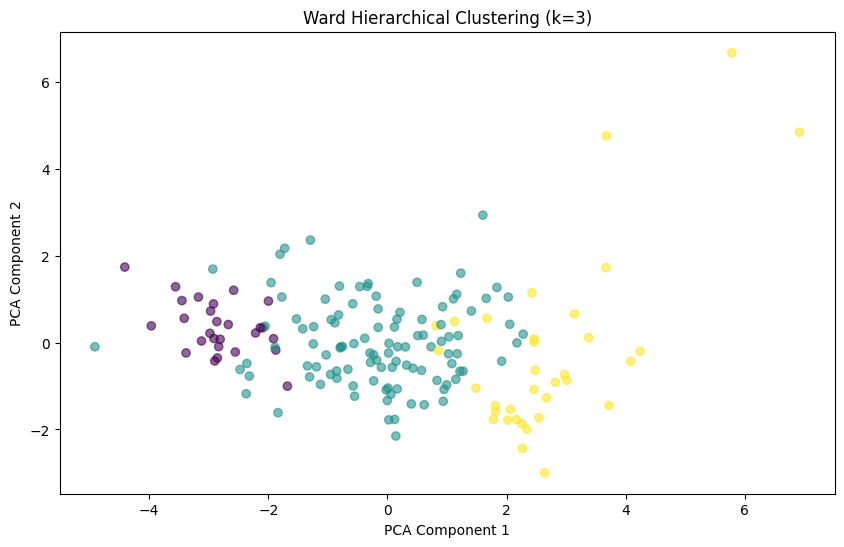

In [8]:
from hierarchical import AgglomerativeClusteringWard

# Fit Ward's hierarchical clustering
ward = AgglomerativeClusteringWard(n_clusters=3)
ward.fit(X_scaled)

# Visualize clusters
plot_clusters(X_scaled, ward.labels_, None, 'Ward Hierarchical Clustering (k=3)')

# SciPy

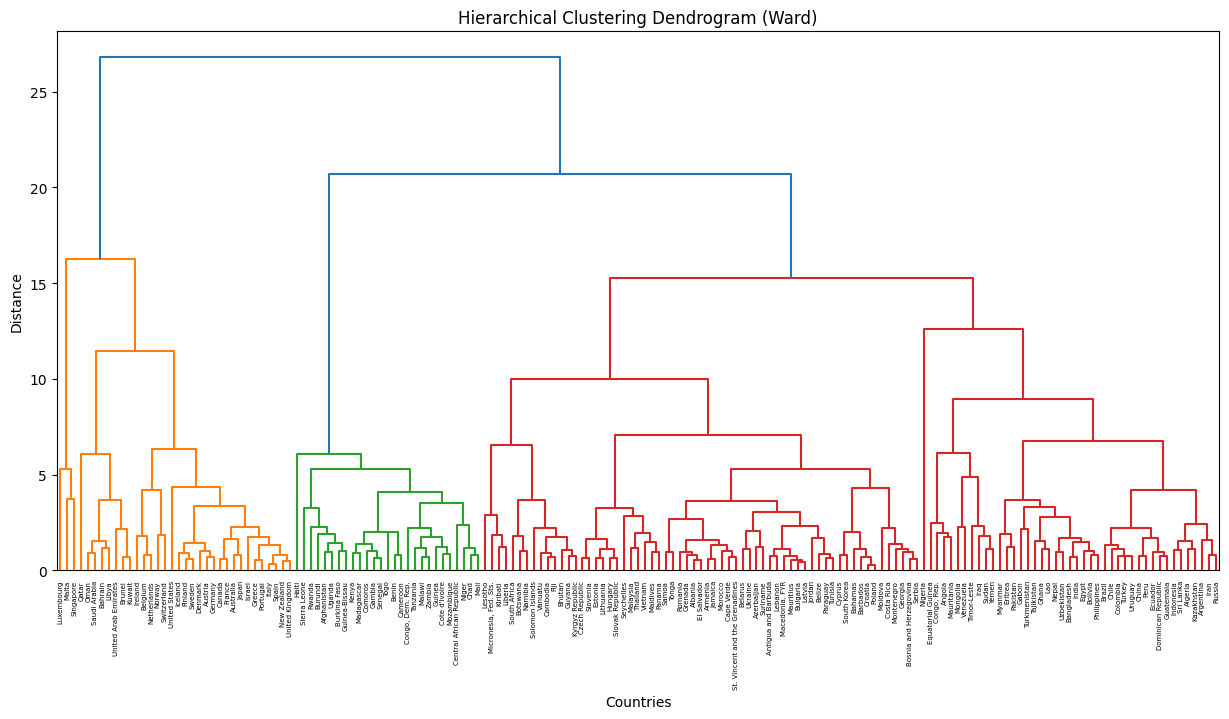

In [3]:
# Compute linkage matrix using Ward's method (minimizes variance)
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, labels=countries.values, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

In [4]:
# Cut the dendrogram to get cluster labels (e.g., 3 clusters)
num_clusters = 3
labels = fcluster(Z, t=num_clusters, criterion='maxclust')
# labels -= 1  

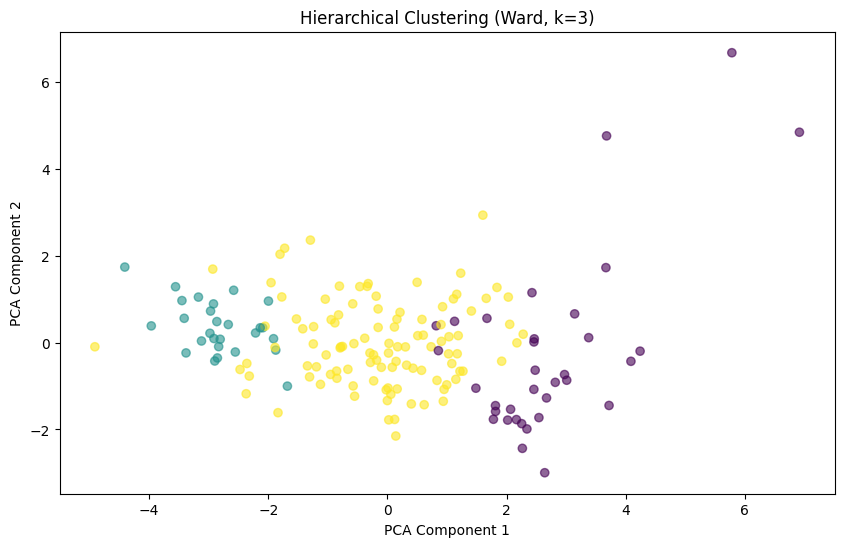

In [5]:
# Assign labels to the dataframe
df['hierarchical_cluster'] = labels

# Visualize
plot_clusters(X_scaled, labels, None, 'Hierarchical Clustering (Ward, k=3)')

In [6]:
# Calculate mean values for each cluster
cluster_summary = df.drop('country', axis=1).groupby('hierarchical_cluster').mean()
print(cluster_summary)

                      child_mort    exports    health    imports  \
hierarchical_cluster                                               
1                       5.961765  58.508824  8.501176  48.902941   
2                     105.070370  23.589630  6.507037  39.662963   
3                      31.617925  39.990368  6.353679  48.085527   

                            income  inflation  life_expec  total_fer  \
hierarchical_cluster                                                   
1                     47588.235294   4.115500   79.982353   1.888529   
2                      1589.740741   7.142778   57.248148   5.433704   
3                     11341.886792   9.120604   70.921698   2.654623   

                              gdpp  
hierarchical_cluster                
1                     43170.588235  
2                       667.888889  
3                      6407.367925  
